In [15]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

In [8]:
img_rows, img_cols = 28, 28

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [10]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [11]:
input_shape = (img_rows, img_cols, 1)

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [13]:
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train sample')
print(x_test.shape[0], 'test sample')

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train sample
10000 test sample


In [16]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
model = load_model('mnist_cnn.h5')    # 만들어둔 모델 불러오기

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

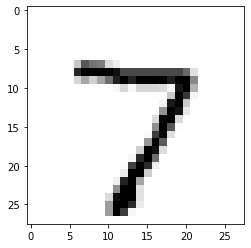

In [17]:
# n번째 이미지 보기
n = 0
plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

In [21]:
print('The answer is', np.argmax(model.predict(x_test[n].reshape(1,28,28,1)), axis=-1))    # axis=-1: 현재 배열의 마지막 axis

The answer is [7]


In [22]:
model.predict(x_test[n].reshape(1,28,28,1))

array([[1.4729289e-15, 4.5486465e-11, 1.4392677e-10, 6.9334312e-09,
        2.7651690e-14, 2.0478643e-14, 4.3556570e-19, 1.0000000e+00,
        2.4228014e-14, 4.5779983e-10]], dtype=float32)

In [23]:
model.predict(x_test)

array([[1.4729289e-15, 4.5486552e-11, 1.4392705e-10, ..., 1.0000000e+00,
        2.4228014e-14, 4.5780071e-10],
       [1.6405342e-11, 8.3950502e-10, 1.0000000e+00, ..., 1.4853663e-13,
        4.7590275e-15, 8.2097652e-14],
       [1.6806193e-10, 9.9999857e-01, 3.4344751e-08, ..., 1.2515964e-06,
        3.8601420e-09, 1.4260796e-08],
       ...,
       [1.8430082e-18, 2.4600998e-11, 5.0425519e-15, ..., 9.5379607e-11,
        2.0093116e-11, 4.5364495e-10],
       [3.6897197e-13, 3.8200437e-14, 1.3441205e-19, ..., 8.6100539e-16,
        2.9041443e-08, 5.9655210e-13],
       [3.4564605e-09, 4.5769877e-13, 1.8794052e-10, ..., 1.2974115e-17,
        2.4914940e-10, 3.6578956e-12]], dtype=float32)

In [24]:
np.argmax(y_test, axis=1)    # 열 기준. 라벨링한 값

array([7, 2, 1, ..., 4, 5, 6])

In [26]:
predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)    # 열 기준 가장 큰 값이 나온 인덱스(예측값)
test_labels = np.argmax(y_test, axis=1)                  # 열 기준 가장 큰 값이 나온 인덱스(참값)

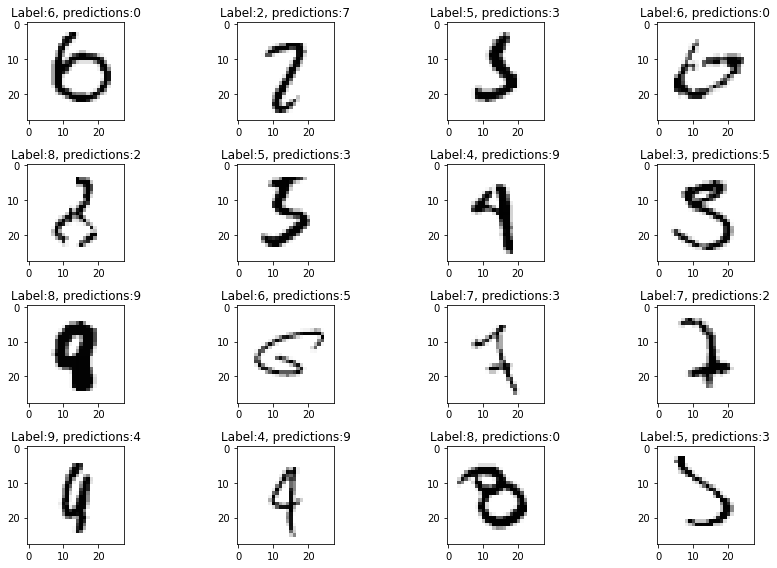

In [29]:
wrong_result = []

for n in range(0, len(test_labels)):
  if predicted_labels[n] != test_labels[n]:    # 실제와 값이 다르게 예측되면
    wrong_result.append(n)

count = 0
nrows = 4
ncols = 4

plt.figure(figsize=(12,8))

for n in wrong_result:
  count += 1
  plt.subplot(nrows, ncols, count)
  plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
  tmp = 'Label:' + str(test_labels[n]) + ', predictions:' + str(predicted_labels[n])
  plt.title(tmp)

  if count == 16:    # 잘못된 결과는 16개까지만 확인
    break

plt.tight_layout()
plt.show()